In [ ]:
# Dump Path: r'/content/drive/My Drive/BE Project/Content Dataset Classification Dumps/'
# Dataset Path
# r'/content/drive/My Drive/Predictive Analysis of Crowdfunding Platforms/9.Content Dataset (Final)/Content Dataset Cleaned Final.csv'

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import glob
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the dataset
df = pd.read_csv(r'/content/drive/My Drive/Predictive Analysis of Crowdfunding Platforms/9.Content Dataset (Final)/Content Dataset Cleaned Final.csv')
print(df.shape)
df.tail()

(18065, 21)


,Status,Currency,Main Category,Sub Category,Rewards,Goal,Pledged,Backers,Duration,Facebook Connected,Facebook Friends,Facebook Shares,Has Video,Has Website,Projects Created,Projects Backed,Videos,Images,Description Words,Risks and Challenges Words,FAQ
18060,0,1,2,2800,2,2000,255,5,4,0,0,62,0,0,1,0,0,0,269,27,0
18061,1,3,7,1500,5,400,400,7,5,0,0,11,0,0,1,0,0,2,506,51,0
18062,0,1,3,3700,4,600,500,8,4,1,407,16,1,0,3,1,0,0,193,64,2
18063,0,1,10,7700,3,500,23,4,1,1,1029,53,0,0,1,0,0,0,183,88,0
18064,0,2,5,1300,6,20000,6595,86,3,1,301,259,0,0,1,0,0,6,372,156,0


In [ ]:
X=df[['Currency','Main Category','Sub Category','Rewards','Goal','Duration','Facebook Connected','Facebook Friends','Facebook Shares','Has Video','Has Website','Projects Created','Projects Backed','Videos','Images','Description Words','Risks and Challenges Words','FAQ']]
Y=df['Status']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_curve, auc

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
print("Train Shape:", X_train.shape)
print("Test Shape:", X_test.shape)

Train Shape: (14452, 18)
Test Shape: (3613, 18)


In [ ]:
# Confusion Matrix
def heat_map():
  cm = confusion_matrix(y_test, y_predict)
  f, ax = plt.subplots(figsize =(5,5))
  sns.heatmap(cm, annot = True, linewidths=0.5, linecolor="red", fmt =".0f", ax=ax)
  plt.xlabel("Prediction")
  plt.ylabel("Actual")
  plt.show()

In [ ]:
# Classification Report
from sklearn.metrics import classification_report
def report():
  print(classification_report(y_test, y_predict))

In [ ]:
# Cross Validation Score
from sklearn.model_selection import cross_val_score
def cross_val(model): 
  clf_eval = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
  print('Cross Validation Mean : %f'%(clf_eval.mean()))

In [ ]:
from sklearn.metrics import roc_curve
def auc_roc(model):
  pred_prob1 = model.predict_proba(X_test)
  fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1

#Algorithms

Score:  0.7340160531414337


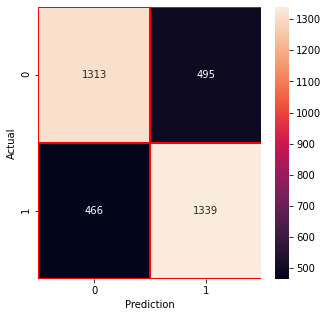

              precision    recall  f1-score   support

           0       0.74      0.73      0.73      1808
           1       0.73      0.74      0.74      1805

    accuracy                           0.73      3613
   macro avg       0.73      0.73      0.73      3613
weighted avg       0.73      0.73      0.73      3613

Cross Validation Mean : 0.732010


In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
print("Score: ", dt.score(X_test, y_test))
y_predict = dt.predict(X_test)
heat_map()
report()
cross_val(dt)

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
for i in range(100, 1001, 100):
  clf = RandomForestClassifier(n_estimators=i)
  clf.fit(X_train, y_train)
  y_predict = clf.predict(X_test)
  print("Accuracy:", metrics.accuracy_score(y_test, y_predict))
y_predict = clf.predict(X_test)
heat
report()
cross_val(clf)

Accuracy: 0.8148353169111542
Accuracy: 0.8198173263216164
Accuracy: 0.8173263216163853
Accuracy: 0.8176030999169666
Accuracy: 0.813451425408248
Accuracy: 0.8151120952117354
Accuracy: 0.8164959867146415
Accuracy: 0.8187102131192915
Accuracy: 0.8167727650152228
Accuracy: 0.8184334348187102


NameError: ignored

In [ ]:
print(y_predict)

[1 1 1 ... 0 1 0]


Score:  0.7594796567949073


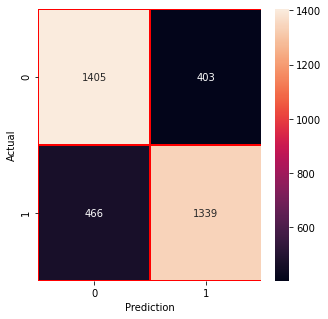

              precision    recall  f1-score   support

           0       0.75      0.78      0.76      1808
           1       0.77      0.74      0.76      1805

    accuracy                           0.76      3613
   macro avg       0.76      0.76      0.76      3613
weighted avg       0.76      0.76      0.76      3613

Cross Validation Mean : 0.759688


In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
print("Score: ", lr.score(X_test,y_test))
y_predict = lr.predict(X_test)
heat_map()
report()
cross_val(lr)

Score:  0.7187932466094659


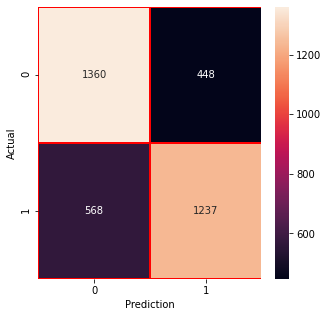

              precision    recall  f1-score   support

           0       0.71      0.75      0.73      1808
           1       0.73      0.69      0.71      1805

    accuracy                           0.72      3613
   macro avg       0.72      0.72      0.72      3613
weighted avg       0.72      0.72      0.72      3613

Cross Validation Mean : 0.719971


In [ ]:
# SVM 
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)
print("Score: ", clf.score(X_test,y_test))
y_predict = clf.predict(X_test)
heat_map()
report()
cross_val(clf)

Score:  0.6030999169665098
Score:  0.6412953224467202
Score:  0.6473844450595073
Score:  0.6490451148629948
Score:  0.6487683365624135
Score:  0.650429006365901
Score:  0.6460005535566011
Score:  0.6451702186548575
Score:  0.6448934403542762
Score:  0.6462773318571824


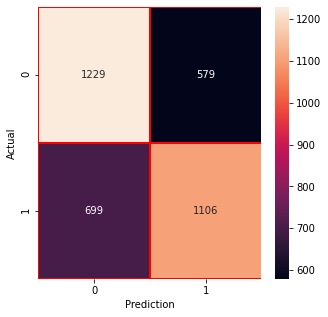

              precision    recall  f1-score   support

           0       0.64      0.68      0.66      1808
           1       0.66      0.61      0.63      1805

    accuracy                           0.65      3613
   macro avg       0.65      0.65      0.65      3613
weighted avg       0.65      0.65      0.65      3613

Cross Validation Mean : 0.655895


In [ ]:
# KNN 
from sklearn.neighbors import KNeighborsClassifier
for i in range(1, 101, 10):
  neigh = KNeighborsClassifier(n_neighbors=i)
  neigh.fit(X_train, y_train)
  print("Score: ", neigh.score(X_test,y_test))
y_predict = neigh.predict(X_test)
heat_map()
report()
cross_val(neigh)

Score:  0.6266260725159147


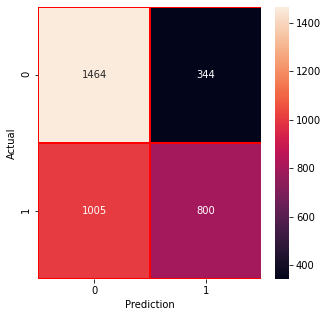

              precision    recall  f1-score   support

           0       0.59      0.81      0.68      1808
           1       0.70      0.44      0.54      1805

    accuracy                           0.63      3613
   macro avg       0.65      0.63      0.61      3613
weighted avg       0.65      0.63      0.61      3613

Cross Validation Mean : 0.630362


In [ ]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
print("Score: ", clf.score(X_test,y_test))
y_predict = clf.predict(X_test)
heat_map()
report()
cross_val(clf)

#Feature Extraction

In [ ]:
X=df[['Currency','Main Category','Goal','Rewards','Duration','Facebook Friends','Facebook Shares','Has Video','Has Website','Projects Created','Projects Backed',
      'Videos','Images','Description Words','FAQ']]
Y=df['Status']
df.corr()['Status']

Status                        1.000000
Currency                     -0.062573
Main Category                -0.047470
Sub Category                  0.023038
Rewards                       0.189275
Goal                         -0.022263
Pledged                       0.113016
Backers                       0.175428
Duration                     -0.140419
Facebook Connected            0.017968
Facebook Friends              0.125734
Facebook Shares               0.102577
Has Video                     0.153890
Has Website                   0.075359
Projects Created              0.072292
Projects Backed               0.108134
Videos                        0.056984
Images                        0.107807
Description Words             0.090143
Risks and Challenges Words    0.007530
FAQ                           0.119187
Name: Status, dtype: float64

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
print("Train Shape:", X_train.shape)
print("Test Shape:", X_test.shape)

Train Shape: (14452, 15)
Test Shape: (3613, 15)


In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
for i in range(100, 1001, 100):
  clf = RandomForestClassifier(n_estimators=i)
  clf.fit(X_train, y_train)
  y_predict = clf.predict(X_test)
  print("Accuracy:", metrics.accuracy_score(y_test, y_predict))
y_predict = clf.predict(X_test)
heat_map()
report()
cross_val(clf)

Accuracy: 0.8214779961251037
Accuracy: 0.8239690008303349
Accuracy: 0.8259064489344036
Accuracy: 0.8261832272349848
Accuracy: 0.8256296706338223
Accuracy: 0.8261832272349848
Accuracy: 0.8259064489344036
Accuracy: 0.825352892333241
Accuracy: 0.8256296706338223
Accuracy: 0.8250761140326598


NameError: ignored

#MLP

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(12, input_dim=X_train.shape[1], activation='swish'))
model.add(Dense(8,  activation='swish'))
model.add(Dense(1,  activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
h=model.fit(X_train, y_train, epochs=150, batch_size=8)

Epoch 1/150
1807/1807 [==============================] - 3s 1ms/step - loss: 0.6519 - accuracy: 0.6092
Epoch 2/150
1807/1807 [==============================] - 2s 1ms/step - loss: 0.5778 - accuracy: 0.6960
Epoch 3/150
1807/1807 [==============================] - 2s 1ms/step - loss: 0.5463 - accuracy: 0.7258
Epoch 4/150
1807/1807 [==============================] - 2s 1ms/step - loss: 0.5141 - accuracy: 0.7554
Epoch 5/150
1807/1807 [==============================] - 2s 1ms/step - loss: 0.4945 - accuracy: 0.7637
Epoch 6/150
1807/1807 [==============================] - 2s 1ms/step - loss: 0.4766 - accuracy: 0.7755
Epoch 7/150
1807/1807 [==============================] - 2s 1ms/step - loss: 0.4661 - accuracy: 0.7817
Epoch 8/150
1807/1807 [==============================] - 2s 1ms/step - loss: 0.4639 - accuracy: 0.7857
Epoch 9/150
1807/1807 [==============================] - 2s 1ms/step - loss: 0.4547 - accuracy: 0.7935
Epoch 10/150
1807/1807 [==============================] - 2s 1ms/step - l

In [ ]:
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

113/113 [==============================] - 0s 1ms/step - loss: 0.4169 - accuracy: 0.8082
Accuracy: 80.82


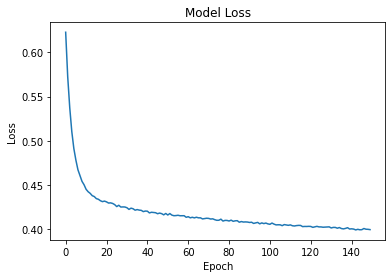

In [ ]:
plt.plot(h.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [ ]:
model.save('/content/drive/My Drive/BE Project/Content Dataset Classification Dumps/')

INFO:tensorflow:Assets written to: /content/drive/My Drive/BE Project/Content Dataset Classification Dumps/assets


#Load Model

In [ ]:
import keras
model = keras.models.load_model('/content/drive/My Drive/BE Project/Content Dataset Classification Dumps/')

In [ ]:
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

113/113 [==============================] - 0s 890us/step - loss: 0.5249 - accuracy: 0.7473
Accuracy: 74.73
